# 0. Computer vision libraries in Pytorch

* `torchvision` - Base domain library for Pytorch computer Vision
* `torchvision.datasets` - get datasets and data loading function for computer vision
* `torchvision.models` - get pretrained computer vision models that we can leverage
* `torchvision.transforms` - functions for manipulating our vision data to be suitable to use with our ML model
* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.Dataloader` - Create a Python iterable over a dataset

In [1]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# import matplotlib
import  matplotlib.pyplot as plt

# check version
print(f'torch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')


torch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


# 1. Getting a dataset
In this example, we will use Fashion MNIST from torchvision.dataset

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='./data', # where to download the data
    train=True, # set to False if we are about to create test_data
    download=True, # whether we want to download the data
    transform=ToTensor(), # how do we want to transform the data (in this case, we transform from PIL image to Tensor
    target_transform=None # how to we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root='./data', # where to download the data
    train=False, # set to False if we are about to create test_data
    download=True, # whether we want to download the data
    transform=ToTensor(), # how do we want to transform the data (in this case, we transform to Tensor
    target_transform=None # how to we want to transform the labels
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

## 1.1. Check the input and output shape of data

In [4]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# see all the labels
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_names, class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [6]:
# check the shape of our image
print(f'Image shape: {image.shape} -> [color_channel, width,height]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channel, width,height]
Image label: Ankle boot


## 1.2. Visualizing the data

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')

Image shape: torch.Size([1, 28, 28])


In [8]:
# This will raise error since the shape of the image is not compatible 
# plt.imshow(image)

Text(0.5, 1.0, 'Ankle boot')

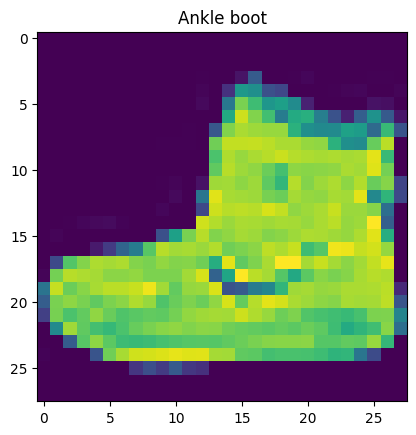

In [9]:
plt.imshow(image.squeeze())
plt.title(class_names[label])

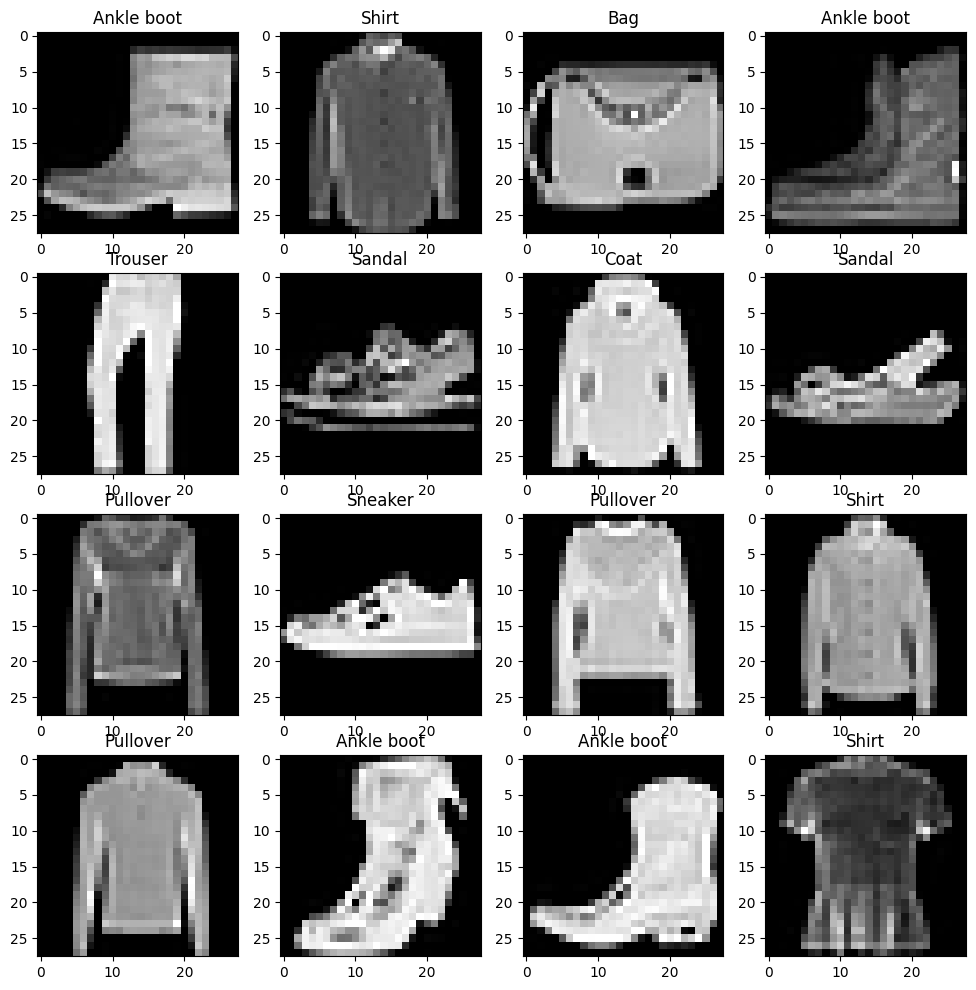

In [10]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(12,12))
rows, cols = 4,4
for i in range(1, rows*cols +1 ):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])

# 2. Prepare Dataloader

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

At the moment, out data is in form of Pytorch Dataset. We will use Dataloader to turn the dataset in to python iterable object.
To be precise, we want to turn the data into batches. In practical, the dataset for machine learning is notably big, we will want to break it into smaller batches to:
1. It is more efficient, the hardware might not be able to store all the images in one hit. So we break it down to, for example, 32 images at a time.
2. It gives our neural network more chances to update its gradients per epoch.

In [12]:
from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# turn the datasets into iterable object
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True, # we will shuffle the data to make sure a batch wont have only data of one class
)
test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE
)
print(f'train_loader:{train_dataloader}, test_dataloader:{test_dataloader}')
print(f'Length of train_loader: {len(train_dataloader)}, length of test_loader:{len(test_dataloader)}')

train_loader:<torch.utils.data.dataloader.DataLoader object at 0x0000020737E73410>, test_dataloader:<torch.utils.data.dataloader.DataLoader object at 0x0000020737F5B590>
Length of train_loader: 1875, length of test_loader:313


In [13]:
# Check what inside train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f'train_features_batch shape: {train_features_batch.shape}')
print(f'train_labels_batch shape: {train_labels_batch.shape}')

train_features_batch shape: torch.Size([32, 1, 28, 28])
train_labels_batch shape: torch.Size([32])


Text(0.5, 1.0, 'Bag')

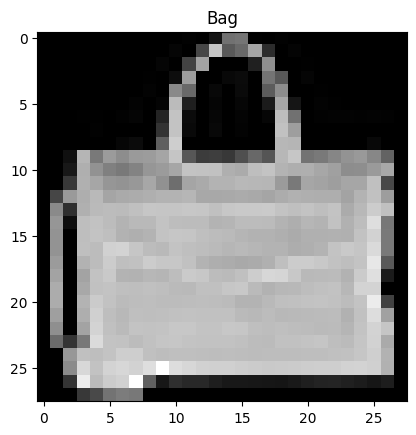

In [14]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])

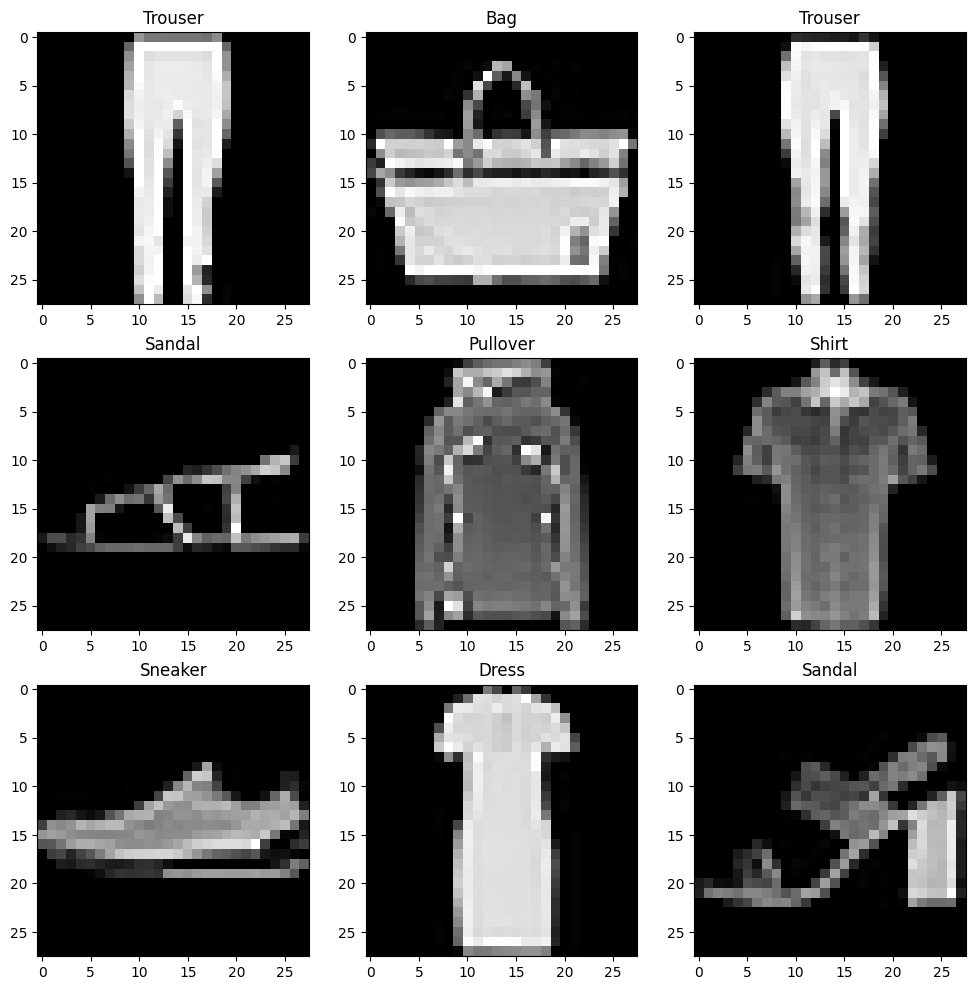

In [15]:
# show more samples in a batch
fig = plt.figure(figsize=(12,12))
rows, cols = 3, 3
for i in range(1, rows * cols +1):
    image, label = train_features_batch[i], train_labels_batch[i]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])


# 3. Model 0: build a baseline model
We will build a series of machine learning modelling experiments, it's best practice to start with baseline model.
A baseline model is a simple model we will try to improve upon with subsequent models.
 Start simply and then add complexity if necessary

In [16]:
# create a flatten layer
flatter_model = nn.Flatten()

# get a single sample
sample = train_features_batch[0]
output = flatter_model(sample)

# print out
print(f'28 x 28 = {28*28}')
print(f'Shape of sample: {sample.shape}, shape of output:{output.shape}')

28 x 28 = 784
Shape of sample: torch.Size([1, 28, 28]), shape of output:torch.Size([1, 784])


In [17]:
from torch import nn
class FashionMNISTmodelV0(nn.Module):
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

model_0 = FashionMNISTmodelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_sample = torch.rand(size=[1,1,28,28])
model_0(dummy_sample)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## 3.1. Setup loss function, optimizer and evaluation metrics
* Loss function - [`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
* Optimizer - `torch.optim.SGD()`
* Evaluation metrics 

In [20]:
import requests
from pathlib import Path

# download helper function
if Path('helper/helper_functions.py').is_file():
    print('helper_functions.py is already exists')
else:
    print('Downloading...')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py is already exists


In [21]:
# import accuracy metric
from helper.helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

## 3.2. Create a function to time experiments

In [22]:
from timeit import default_timer as timer
def print_train_time(start: timer, end: timer, device: str) -> float:
    """
    print difference between start and end time
    :param start: 
    :param end: 
    :param device: 
    :return: 
    """
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} second ')
    return total_time

## 3.3. Create training loop
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**
4. Print out the process
5. Time the process

In [23]:
from tqdm.auto import tqdm

# Set up the seed and start the timer
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
train_time_start_on_cpu = timer()

# Set up the number of epochs
epochs = 3

# Create training loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch {epoch}\n-----')
    ### Training
    train_loss = 0
    # Loop through the training batches
    for batch,(image,label) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(image)
        # 2. Calculate the loss
        loss = loss_fn(y_pred,label)
        train_loss += loss
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimize step
        optimizer.step()
    
        # Print out process
        if batch % 100 == 0:
            print(f'Look at {batch*len(image)}/{len(train_dataloader.dataset)} samples')
    # Divide total train loss by length if train dataloader 
    train_loss /= len(train_dataloader)
    
    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for image, label in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(image)
            # 2. Calculate the loss
            loss = loss_fn(test_pred, label)
            test_loss += loss
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=label,y_pred=test_pred.argmax(dim=1))
        # Calculate the test loss and test accuracy average per batch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    # print out the process
    print(f'\nTrain lost: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----
Look at 0/60000 samples
Look at 3200/60000 samples
Look at 6400/60000 samples
Look at 9600/60000 samples
Look at 12800/60000 samples
Look at 16000/60000 samples
Look at 19200/60000 samples
Look at 22400/60000 samples
Look at 25600/60000 samples
Look at 28800/60000 samples
Look at 32000/60000 samples
Look at 35200/60000 samples
Look at 38400/60000 samples
Look at 41600/60000 samples
Look at 44800/60000 samples
Look at 48000/60000 samples
Look at 51200/60000 samples
Look at 54400/60000 samples
Look at 57600/60000 samples

Train lost: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch 1
-----
Look at 0/60000 samples
Look at 3200/60000 samples
Look at 6400/60000 samples
Look at 9600/60000 samples
Look at 12800/60000 samples
Look at 16000/60000 samples
Look at 19200/60000 samples
Look at 22400/60000 samples
Look at 25600/60000 samples
Look at 28800/60000 samples
Look at 32000/60000 samples
Look at 35200/60000 samples
Look at 38400/60000 samples
Look at 41600/60000 samples
Loo

# 4. Make predictions and get Model 0 results

In [24]:
torch.manual_seed(RANDOM_SEED)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    """
    Return a dictionary of the results of model predicting on data_loader
    :param model: 
    :param data_loader: 
    :param loss_fn: 
    :param accuracy_fn: 
    :return: 
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for image, label in tqdm(data_loader):
            image, label = image.to(device), label.to(device)
            y_pred = model(image)
            loss += loss_fn(y_pred, label)
            acc += accuracy_fn(label, y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=torch.device('cpu'))
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 5. Setup device agnostic-code


In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# 6. Model_1: build model with non-linearity

In [26]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )
    
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [27]:
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=10)
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.1. Create loss, optimizer and evaluate metrics

In [28]:
from helper.helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## 6.2. Functionizing training and testing loops

In [29]:
def train_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device
               ):
    """
    Performs a training with model trying to learn on data_loader
    :param model: 
    :param data_loader: 
    :param loss_fn: 
    :param optimizer: 
    :param accuracy_fn: 
    :param device: 
    """
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch,(image, label) in enumerate(data_loader):
        # Put data to target device
        image, label = image.to(device), label.to(device)
        # 1. Forward pass
        y_pred = model(image)
        # 2. Calculate loss and accuracy
        loss = loss_fn(y_pred,label)
        train_loss += loss
        train_acc += accuracy_fn(label, y_pred.argmax(dim=1))
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()
        
        # print out process
        if batch % 500 == 0:
            print(f'Look at {batch * len(image)}/{len(data_loader.dataset)} samples')
    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')    

In [30]:
def test_step(model:nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device
              ):
    """
    Perform a testing loop step on model going over data_loader
    :param model: 
    :param data_loader: 
    :param loss_fn: 
    :param optimizer: 
    :param accuracy_fn: 
    :param device: 
    """
    test_loss, test_acc = 0, 0
    model.to(device)
    # Put model to eval mode
    model.eval()
    with torch.inference_mode():
        for image, label in data_loader:
            image, label = image.to(device), label.to(device)
            # 1. Forward pass
            test_pred = model(image)
            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, label)
            test_acc += accuracy_fn(label, test_pred.argmax(dim=1))
        # Adjust the metrics
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss:{test_loss:.5f} | Test acc: {test_acc:.2f}%')

In [31]:
torch.manual_seed(RANDOM_SEED)

# Measure time
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_strep and test_step
for epoch in tqdm( range(epochs)):
    print(f'Epoch: {epoch}\n----')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device = device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Look at 0/60000 samples
Look at 16000/60000 samples
Look at 32000/60000 samples
Look at 48000/60000 samples
Train loss: 1.11456 | Train acc: 58.46%
Test loss:0.96320 | Test acc: 63.41%
Epoch: 1
----
Look at 0/60000 samples
Look at 16000/60000 samples
Look at 32000/60000 samples
Look at 48000/60000 samples
Train loss: 0.90905 | Train acc: 64.87%
Test loss:0.74544 | Test acc: 72.61%
Epoch: 2
----
Look at 0/60000 samples
Look at 16000/60000 samples
Look at 32000/60000 samples
Look at 48000/60000 samples
Train loss: 0.59506 | Train acc: 78.26%
Test loss:0.49534 | Test acc: 82.68%
Train time on cuda: 32.623 second 


In [32]:
print(model_0_results)
print(total_train_time_model_0)

{'model_name': 'FashionMNISTmodelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}
27.23892939999996


In [33]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [34]:
print(model_1_results)
print(total_train_time_model_1)

{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.49533671140670776, 'model_acc': 82.67771565495208}
32.62327099999993


# 7. Model_2: Build a Cpnvolutional Neural Network (CNN)
CNNs are also known as ConvNets and are known for their capabilities to find pattern in visual data

In [35]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicate the TinyVGG
    """
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        x =  self.conv_block_1(x)
        # print(f'x shape after conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'x shape after conv_block_2: {x.shape}')
        x = self.classifier(x)
        return x

In [36]:
torch.manual_seed(RANDOM_SEED)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
# Create random image
torch.manual_seed(RANDOM_SEED)
rand_image = torch.randn(size=[1,28,28]).unsqueeze(0).to(device)

# Pass image to model
model_2(rand_image)

tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 7.1. Setup loss function and optimizer

In [38]:
from helper.helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## 7.4. Training and testing model_2

In [39]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch {epoch}\n----')
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, 
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
----
Look at 0/60000 samples
Look at 16000/60000 samples
Look at 32000/60000 samples
Look at 48000/60000 samples
Train loss: 0.59763 | Train acc: 78.15%
Test loss:0.39695 | Test acc: 85.99%
Epoch 1
----
Look at 0/60000 samples
Look at 16000/60000 samples
Look at 32000/60000 samples
Look at 48000/60000 samples
Train loss: 0.36199 | Train acc: 86.93%
Test loss:0.37970 | Test acc: 86.00%
Epoch 2
----
Look at 0/60000 samples
Look at 16000/60000 samples
Look at 32000/60000 samples
Look at 48000/60000 samples
Train loss: 0.32070 | Train acc: 88.44%
Test loss:0.32467 | Test acc: 88.31%
Train time on cuda: 43.715 second 


In [40]:
# Get model_2 result
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [41]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3246704041957855,
 'model_acc': 88.30870607028754}

# 8. Compare model results and training times

In [42]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTmodelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.495337,82.677716
2,FashionMNISTModelV2,0.324670,88.308706


In [43]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTmodelV0,0.476639,83.426518,27.238929
1,FashionMNISTModelV1,0.495337,82.677716,32.623271
2,FashionMNISTModelV2,0.324670,88.308706,43.714886


Text(0, 0.5, 'model')

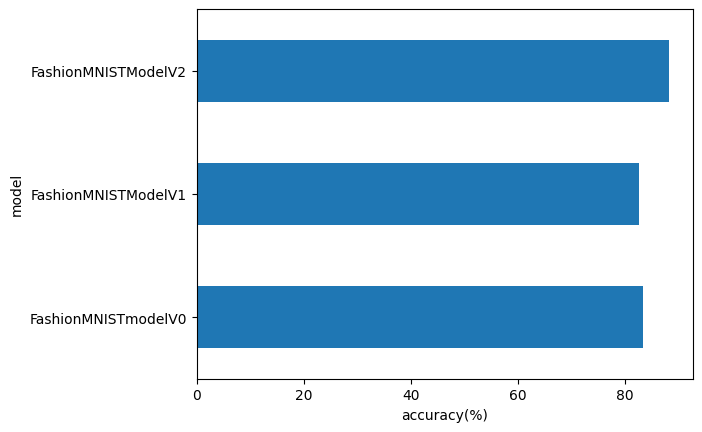

In [44]:
# Visualize the comparison
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy(%)')
plt.ylabel('model')

# 9. Make and evaluate random prediction with the best model

In [45]:
def make_predictions(model:nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            
            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [46]:
import random
random.seed(RANDOM_SEED)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

Text(0.5, 1.0, 'Sandal')

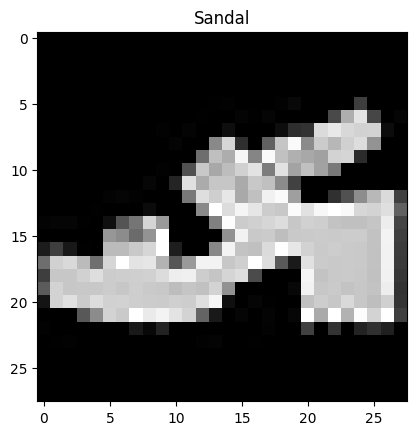

In [47]:
# plot an example
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [48]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two predictions
pred_classes = pred_probs.argmax(dim=1)
pred_classes[:10]

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

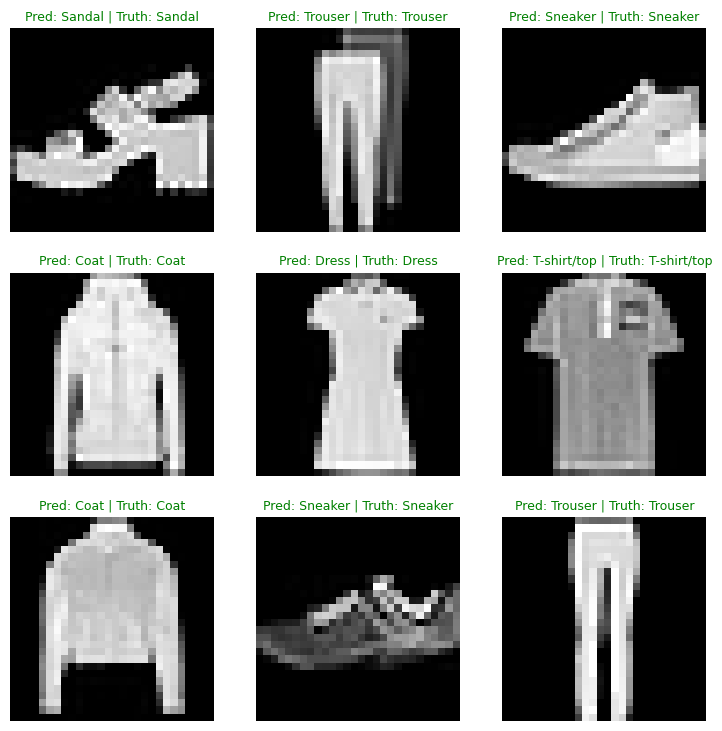

In [49]:
# plot predictions
plt.figure(figsize=(9,9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    # Create subplot 
    plt.subplot(nrows,ncols,i+1)
    # plot the image
    plt.imshow(sample.squeeze(),cmap='gray')
    # Find the prediction
    pred_label = class_names[pred_classes[i]]
    # Get the truth label
    truth_label = class_names[test_labels[i]]
    # Create a title for plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'
    # Check for equality between pred and truth and change the color of title
    if pred_label == truth_label:
        plt.title(title_text, fontsize=9 , c='g')
    else:
        plt.title(title_text, fontsize=9, c='r')
    plt.axis(False)
    

# 10. Make a confusion matrix for further prediction evaluation
A confusion matrix is a way of evaluating classification models visually
1. Make predictions with our train model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [50]:
import mlxtend
mlxtend.__version__

'0.23.3'

In [51]:

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for image, label in test_dataloader:
        image, label = image.to(device), label.to(device)
        y_logit = model_2(image)
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

In [52]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

# 2. Setup confusion instance and compare predictions to target
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
confmat_tensor

tensor([[679,   4,  45,  58,   8,   0, 199,   0,   7,   0],
        [  6, 885,  13,  76,  10,   1,   5,   0,   3,   1],
        [  7,   1, 790,  10,  99,   0,  86,   0,   7,   0],
        [ 32,  12,  29, 832,  43,   0,  47,   0,   3,   2],
        [  6,   4,  92,  42, 742,   0, 111,   0,   3,   0],
        [  6,   4,   2,   9,   2, 836,   4,  52,  65,  20],
        [ 90,   4, 107,  54,  87,   0, 646,   0,  12,   0],
        [  1,   1,   0,   1,   0,  30,   0, 890,  14,  63],
        [ 13,   3,  19,  13,  11,   4,  33,   6, 897,   1],
        [  0,   0,   2,   2,   0,  15,   3,  76,   5, 897]])

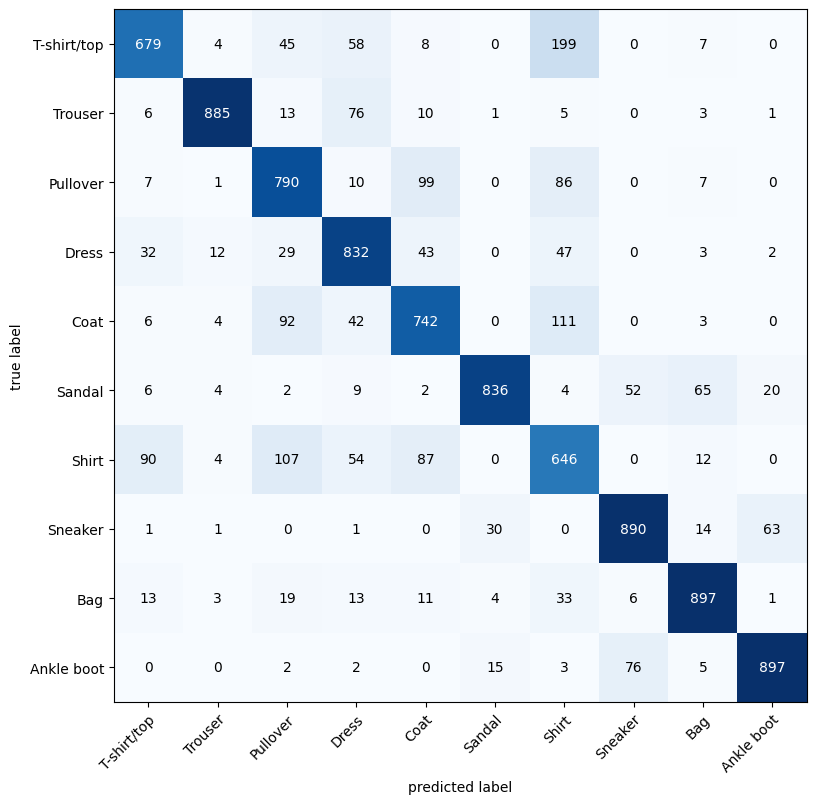

In [53]:
# 3.Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(9,9))

# 11. Save and load model_2

In [55]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# Create model save
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('models/03_pytorch_computer_vision_model_2.pth')

In [56]:
# Save the model state_dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH
           )

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [59]:
# Load the model_2
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names)
                                     )

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

# Send loaded_model_2 to target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [62]:
# Evaluate loaded_model_2
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
loaded_model_2_result = eval_model(model=loaded_model_2,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn,
                                   device=device
                                   )

  0%|          | 0/313 [00:00<?, ?it/s]

In [63]:
loaded_model_2_result

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3246704041957855,
 'model_acc': 88.30870607028754}

In [66]:
compare_models = pd.DataFrame([model_2_results,loaded_model_2_result])
compare_models

,model_name,model_loss,model_acc
0,FashionMNISTModelV2,0.32467,88.308706
1,FashionMNISTModelV2,0.32467,88.308706


In [67]:
# Check if model results are close to each other
torch.isclose(input=torch.tensor(model_2_results['model_loss']),
              other=torch.tensor(loaded_model_2_result['model_loss']))

tensor(True)